Training set size: (60000, 28, 28)
Test set size: (10000, 28, 28)


C:\Users\leand\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.7566 - loss: 0.6641 - val_accuracy: 0.8530 - val_loss: 0.4051
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - accuracy: 0.8386 - loss: 0.4495 - val_accuracy: 0.8685 - val_loss: 0.3529
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.8589 - loss: 0.3927 - val_accuracy: 0.8795 - val_loss: 0.3187
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.8703 - loss: 0.3588 - val_accuracy: 0.8868 - val_loss: 0.2943
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.8767 - loss: 0.3399 - val_accuracy: 0.8947 - val_loss: 0.2843
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.8835 - loss: 0.3226 - val_accuracy: 0.9002 - val_loss: 0.2732
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 36ms/step - accuracy: 0.8865 - loss: 0.3094 - val_accuracy: 0.9015 - val_loss: 0.2661
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8907 - loss: 0.2987 - 

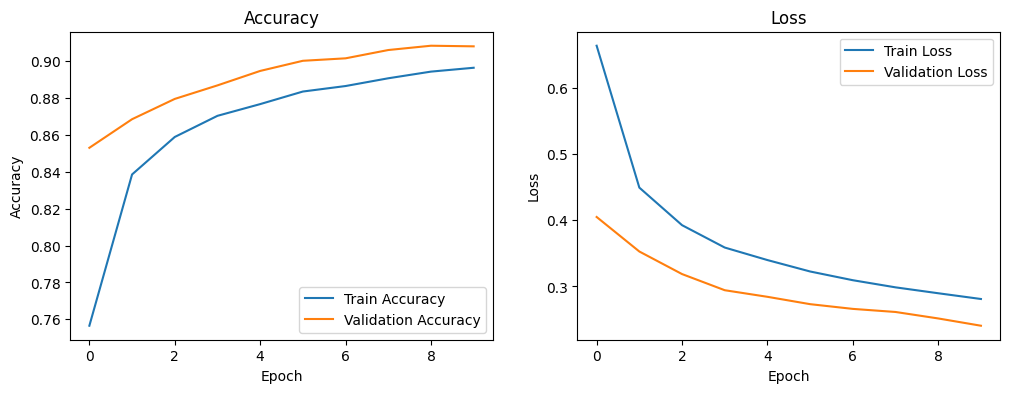


Final Test Accuracy: 0.9031
Final Test Loss: 0.2568
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
✅ Predictions exported to fashion_mnist_predicciones.csv


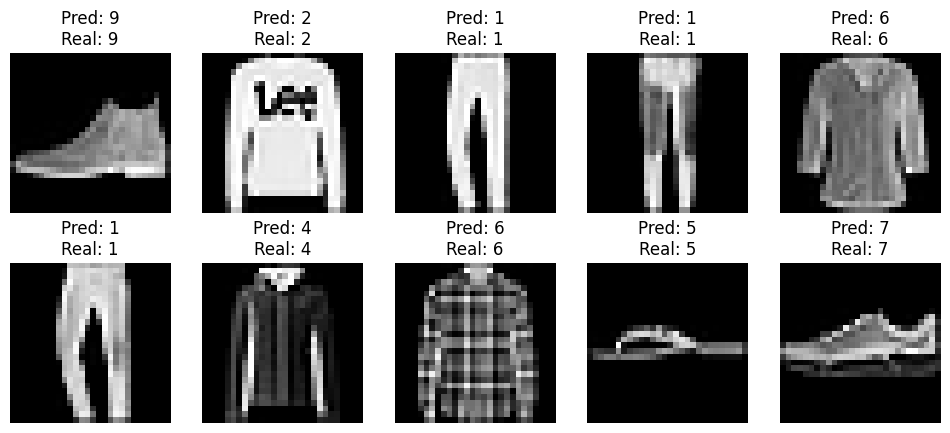

✅ Model ready to predict new images


In [1]:
# ===========================
# ===========================
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

# ===========================
# 2. Load Fashion MNIST dataset
# ===========================
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Training set size:", x_train.shape)
print("Test set size:", x_test.shape)

# ===========================
# 3. Preprocessing
# ===========================
x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# ===========================
# 4. Create CNN model
# ===========================
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ===========================
# 5. Train model
# ===========================
history = model.fit(
    x_train, y_train_cat,
    validation_split=0.1,
    epochs=10,
    batch_size=64
)

# ===========================
# 6. Visualize training metrics
# ===========================
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ===========================
# 7. Final Test
# ===========================
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")
print(f"Final Test Loss: {test_loss:.4f}")

# ===========================
# 8. Predicciones y CSV
# ===========================
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

# Create DataFrame and export
df_results = pd.DataFrame({
    "Image": np.arange(len(x_test)),
    "True_Label": y_test,
    "Prediction": pred_labels
})
df_results.to_csv("fashion_mnist_predicciones.csv", index=False)
print("✅ Predictions exported to fashion_mnist_predicciones.csv")

# ===========================
# 9. Visualize some predictions
# ===========================
plt.figure(figsize=(12,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {pred_labels[i]}\nReal: {y_test[i]}")
    plt.axis('off')
plt.show()

# ===========================
# 10. Function to predict new images
# ===========================
def predict_new(imagen):
    """
    imagen: numpy array 28x28
    """
    imagen_proc = imagen.reshape(1,28,28,1).astype('float32') / 255.0
    pred = model.predict(imagen_proc)
    return np.argmax(pred)

print("✅ Model ready to predict new images")

